# Libraries

In [2]:
%%capture

!pip install numpy
!pip install pybamm
!pip install scikit-learn
!pip install fastsim

# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import glob
import os
import math
#import fastsim
#import pybamm

## EDA

In [3]:
path = "UDDS_HS_TEST"

# Lista todos os arquivos .txt
txt_list = glob.glob(os.path.join(path, "*.txt"))

dfs = []

In [4]:
for txt in txt_list:
    # Extrai TEST ID
    test_id = int(os.path.basename(txt).split()[0])
    
    # Lê o arquivo .txt
    df = pd.read_csv(txt, sep="\t")
    
    # Adiciona coluna "Test_id"
    df["Test_id"] = test_id
    
    dfs.append(df)

In [5]:
# Concatena tudo
df = pd.concat(dfs, ignore_index=True)

In [6]:
# Coloca "Test_id" como a primeira coluna e ordena para começar no primeiro "Test_id"
columns = ["Test_id"] + [col for col in df.columns if col != "Test_id"]
df = df[columns]

df = df.sort_values(by="Test_id").reset_index(drop=True)

In [7]:
df.head(5)

,Test_id,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_RH[%],Test_Cell_Temp[C],Phase_#,Engine_Oil_Temp[C],Engine_Coolant_Temp[C],Engine_Speed[rpm],HV_Battery_Current[A],HV_Battery_Voltage[V],Fuel_Flow_FuelScale[cc/s]
0,61302059,1371.5,0.003,-2.998,43.722,21.639,2.0,88.751,84.0,700.00,5.319,108.831,0.032
1,61302059,1371.6,0.002,-2.998,43.726,21.639,2.0,88.760,84.0,750.75,4.477,108.907,0.032
2,61302059,1371.7,0.003,-2.955,43.732,21.635,2.0,88.768,84.0,716.25,4.509,108.913,0.032
3,61302059,1371.8,0.002,-2.976,43.735,21.635,2.0,88.768,84.0,688.25,4.486,108.921,0.032
4,61302059,1371.9,0.002,-2.955,43.734,21.635,2.0,88.738,84.0,708.75,4.333,108.932,0.032


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69205 entries, 0 to 69204
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Test_id                    69205 non-null  int64  
 1   Time[sec]                  69205 non-null  float64
 2   Dyno_Speed[mph]            69205 non-null  float64
 3   Dyno_Tractive_Effort[N]    69205 non-null  float64
 4   Test_Cell_RH[%]            69205 non-null  float64
 5   Test_Cell_Temp[C]          69205 non-null  float64
 6   Phase_#                    69205 non-null  float64
 7   Engine_Oil_Temp[C]         69205 non-null  float64
 8   Engine_Coolant_Temp[C]     69205 non-null  float64
 9   Engine_Speed[rpm]          69205 non-null  float64
 10  HV_Battery_Current[A]      69205 non-null  float64
 11  HV_Battery_Voltage[V]      69205 non-null  float64
 12  Fuel_Flow_FuelScale[cc/s]  69205 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 6.9 MB


In [9]:
df.isnull().sum()

Test_id                      0
Time[sec]                    0
Dyno_Speed[mph]              0
Dyno_Tractive_Effort[N]      0
Test_Cell_RH[%]              0
Test_Cell_Temp[C]            0
Phase_#                      0
Engine_Oil_Temp[C]           0
Engine_Coolant_Temp[C]       0
Engine_Speed[rpm]            0
HV_Battery_Current[A]        0
HV_Battery_Voltage[V]        0
Fuel_Flow_FuelScale[cc/s]    0
dtype: int64

In [10]:
print("Total de valores nulos:", df.isnull().sum().sum())

Total de valores nulos: 0


In [11]:
df.shape

(69205, 13)

In [12]:
df["Test_id"].value_counts().sort_index()

Test_id
61302059    13841
61302060    13841
61302072    13841
61302096    13841
61302097    13841
Name: count, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Test_id,69205.0,6.130208e+07,16.726148,6.130206e+07,6.130206e+07,6.130207e+07,6.130210e+07,6.130210e+07
Time[sec],69205.0,6.820000e+02,399.558140,-1.000000e+01,3.360000e+02,6.820000e+02,1.028000e+03,1.374000e+03
Dyno_Speed[mph],69205.0,1.946378e+01,14.728512,-3.690000e-01,5.163000e+00,2.155800e+01,2.743100e+01,5.735800e+01
Dyno_Tractive_Effort[N],69205.0,8.233248e+01,1116.857236,-4.033168e+03,-7.892100e+01,1.309400e+01,5.195260e+02,4.449893e+03
Test_Cell_RH[%],69205.0,3.300472e+01,12.471509,1.512200e+01,1.913700e+01,3.795700e+01,4.366100e+01,5.530300e+01
Test_Cell_Temp[C],69205.0,1.331701e+01,17.094769,-8.286000e+00,-6.613000e+00,2.134700e+01,2.393500e+01,3.912100e+01
Phase_#,69205.0,1.623004e+00,0.494525,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
Engine_Oil_Temp[C],69205.0,8.449018e+01,6.561686,0.000000e+00,8.258500e+01,8.574600e+01,8.876800e+01,9.357800e+01
Engine_Coolant_Temp[C],69205.0,8.367223e+01,3.250185,0.000000e+00,8.300000e+01,8.400000e+01,8.500000e+01,9.000000e+01
Engine_Speed[rpm],69205.0,1.192381e+03,565.799224,0.000000e+00,8.880000e+02,1.368000e+03,1.535000e+03,2.737750e+03


#### Outliers

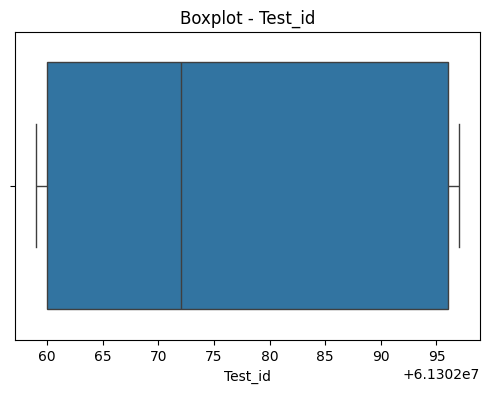

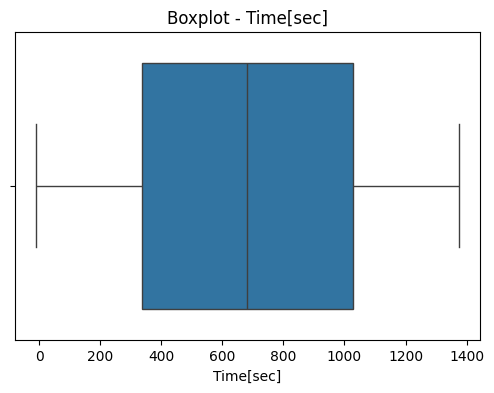

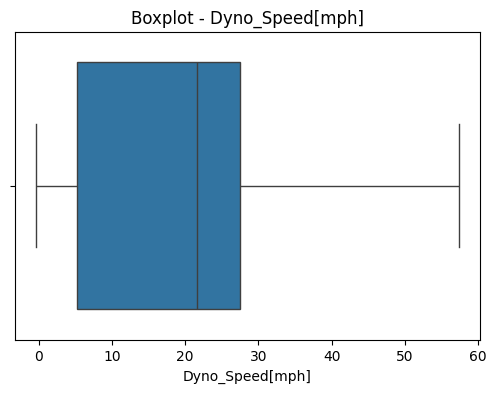

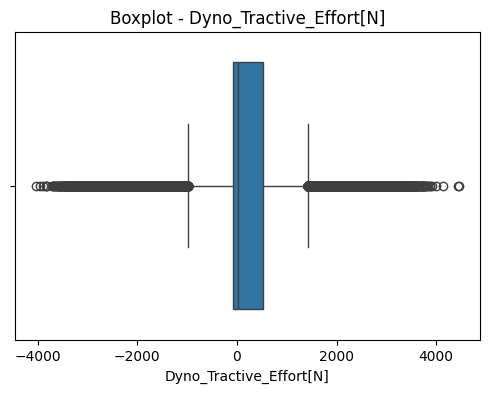

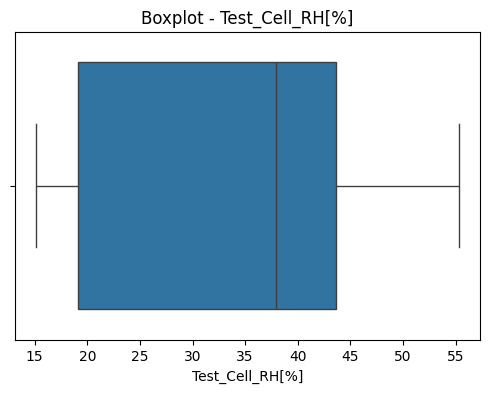

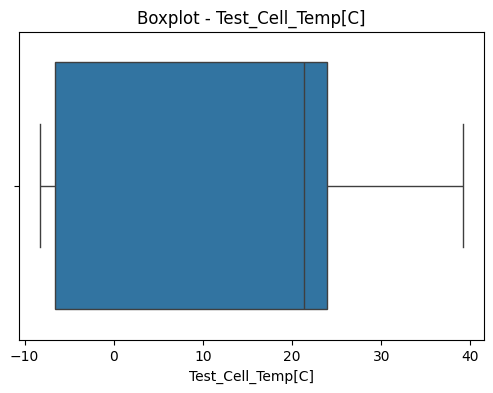

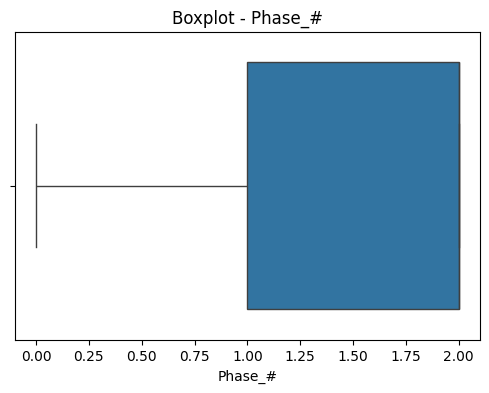

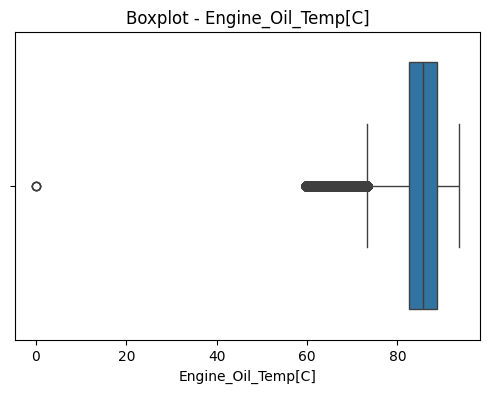

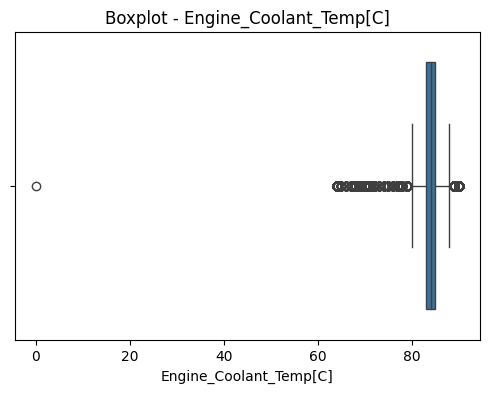

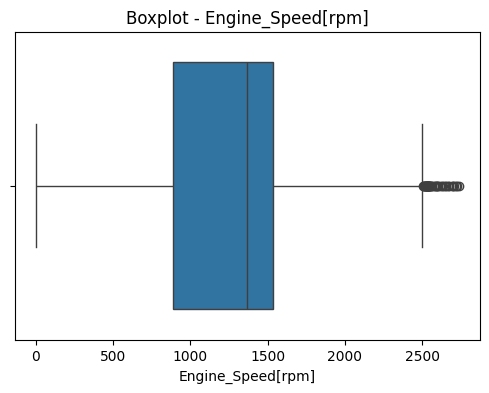

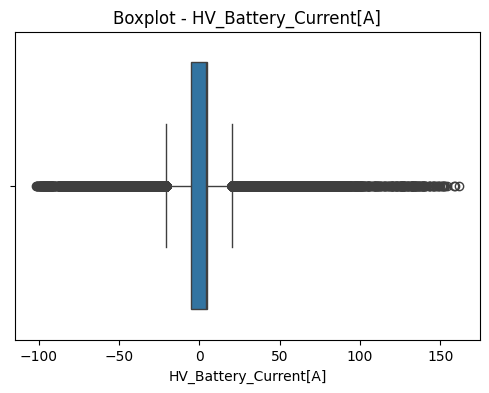

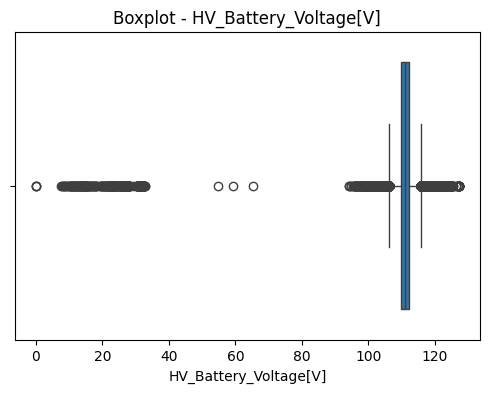

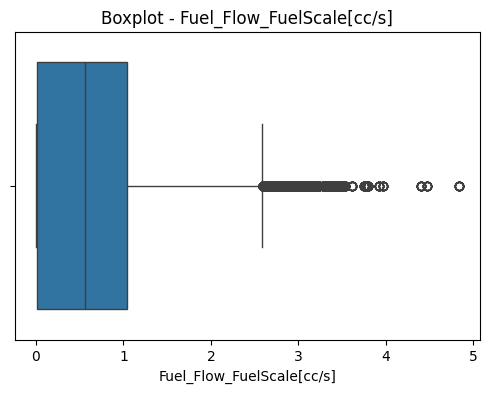

In [14]:
# Gera um boxplot para cada  coluna
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


In [15]:
for col in df.select_dtypes(include=np.number).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    if not outliers.empty:
        print(f"Coluna {col} tem {len(outliers)} outliers")


Coluna Dyno_Tractive_Effort[N] tem 15534 outliers
Coluna Engine_Oil_Temp[C] tem 4733 outliers
Coluna Engine_Coolant_Temp[C] tem 3124 outliers
Coluna Engine_Speed[rpm] tem 44 outliers
Coluna HV_Battery_Current[A] tem 9625 outliers
Coluna HV_Battery_Voltage[V] tem 4436 outliers
Coluna Fuel_Flow_FuelScale[cc/s] tem 1801 outliers


#### Correlação

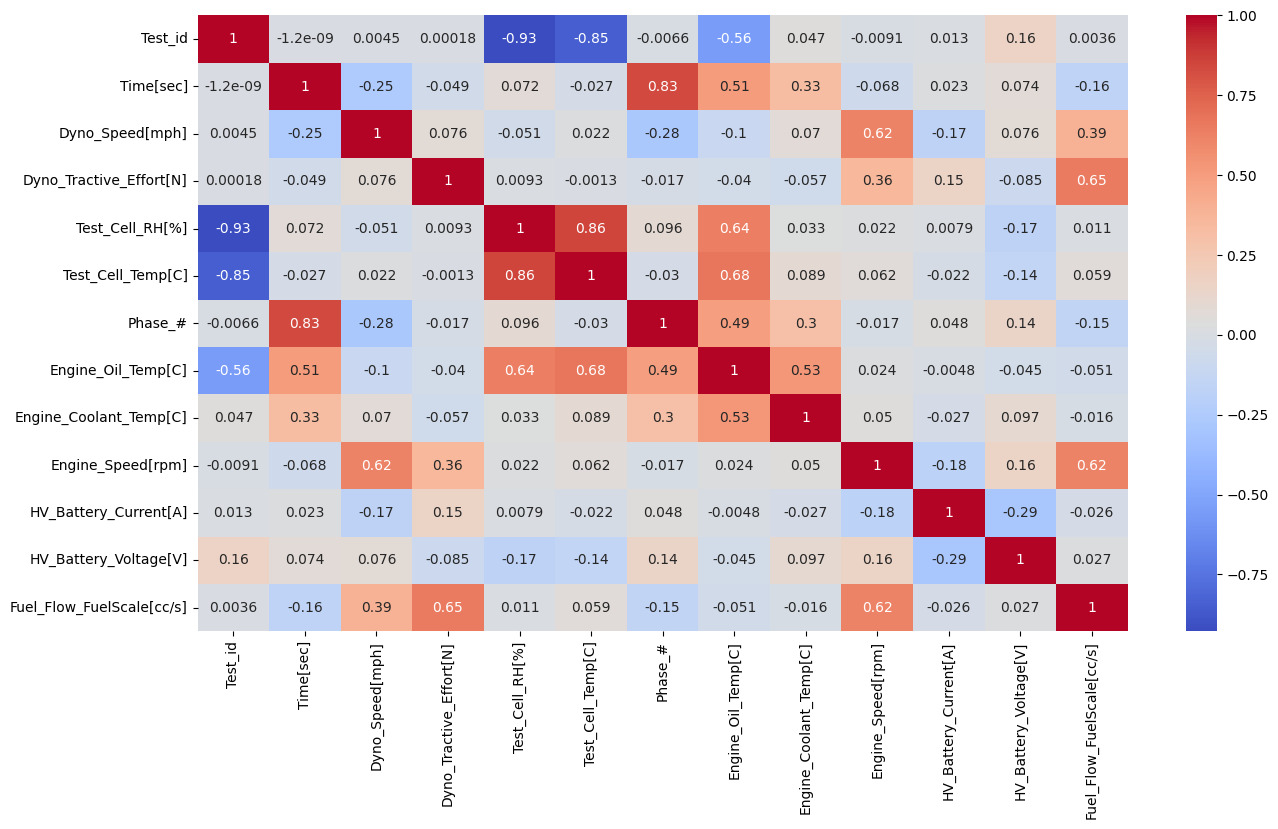

In [16]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
